https://www.worldometers.info/coronavirus (https://www.worldometers.info/coronavirus)


Worldometers has a credible sources of COVID19 data.


In this exersice, we will learn how to get data from Worldmeters website
We will save the data to a csv file, and practice how to plot the data.


# **1- Get data**

Get by BeautifulSoup from this website 

https://www.worldometers.info/coronavirus

This reference will help you 

https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

In [42]:
import requests as req 
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [43]:
html = req.get('https://www.worldometers.info/coronavirus')

In [44]:
html

<Response [200]>

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
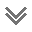

In [45]:
html.content

# **2- Parse html**


**1. Parse html with BeautifulSoup**

**2. Search for the required table "main_table_countries_today"**



In [46]:
html = BeautifulSoup(html.content)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
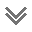

In [47]:
html

In [48]:
table = html.find('table',attrs={'id':"main_table_countries_today"})

In [49]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [50]:
rows = table.find_all('tr')

In [51]:
rows[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [52]:
rows[1]

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>97,395,361</td>
<td>+1,000</td>
<td>1,452,877</td>
<td>+6</td>
<td>93,554,587</td>
<td>+683</td>
<td>2,387,897</td>
<td>6,979</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [53]:
rows[4]

<tr class="total_row_world row_continent" data-continent="Europe" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Europe</nobr>
</td>
<td>186,764,049</td>
<td></td>
<td>1,798,804</td>
<td></td>
<td>168,535,703</td>
<td>+203,882</td>
<td>16,429,542</td>
<td>9,263</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Europe" style="display:none;">Europe</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [54]:
rows[4].text

'\n\n\nEurope\n\n186,764,049\n\n1,798,804\n\n168,535,703\n+203,882\n16,429,542\n9,263\n\n\n\n\n\nEurope\n\n\n\n\n\n\n\n'

In [55]:
rows[4].text.strip()

'Europe\n\n186,764,049\n\n1,798,804\n\n168,535,703\n+203,882\n16,429,542\n9,263\n\n\n\n\n\nEurope'

In [56]:
rows[4].text.strip().split('\n')

['Europe',
 '',
 '186,764,049',
 '',
 '1,798,804',
 '',
 '168,535,703',
 '+203,882',
 '16,429,542',
 '9,263',
 '',
 '',
 '',
 '',
 '',
 'Europe']

# **3- Strore data**

1.  Store rows into list (data)
2.  Convert list into DataFrame
3.  Check the DataFrame
4.  Set the first row as the header, and remove the second row
5.  Check the DataFrame
6.  Save as csv file




In [57]:
data_lists = []
for x in rows:
  data_lists.append(x.text.strip().split('\n')[1:5])

In [58]:
data_lists

[['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths'],
 ['', '97,395,361', '+1,000', '1,452,877'],
 ['', '145,696,918', '+67,479', '1,415,957'],
 ['', '56,547,143', '', '1,291,981'],
 ['', '186,764,049', '', '1,798,804'],
 ['', '6,523,189', '+26,637', '10,012'],
 ['', '11,824,589', '', '253,389'],
 ['', '15', '', '706'],
 ['504,751,970', '+95,116', '6,223,035', '+280'],
 ['USA', '82,316,348', '', '1,015,451 '],
 ['India', '43,043,266', '', '521,782 '],
 ['Brazil', '30,252,618', '', '662,011 '],
 ['France', '27,771,024', '', '144,157 '],
 ['Germany', '23,438,293', '', '133,429 '],
 ['UK', '21,747,638', '', '171,396 '],
 ['Russia', '18,074,717', '', '373,500 '],
 ['S. Korea', '16,353,495', '+47,743', '21,224 '],
 ['Italy', '15,712,088', '', '161,687 '],
 ['Turkey', '14,994,937', '', '98,568 '],
 ['Spain', '11,662,214', '', '103,266 '],
 ['Vietnam', '10,432,547', '', '42,944 '],
 ['Argentina', '9,060,923', '', '128,344 '],
 ['Netherlands', '8,015,576', '', '22,156 '],
 ['Japan', '7,

In [59]:
#convert list to dataframe
df = pd.DataFrame(data_lists)

In [60]:
df.head()

0            1         2            3
0  Country,Other   TotalCases  NewCases  TotalDeaths
1                  97,395,361    +1,000    1,452,877
2                 145,696,918   +67,479    1,415,957
3                  56,547,143              1,291,981
4                 186,764,049              1,798,804

In [61]:
df = pd.DataFrame(data_lists[9:], columns=data_lists[0])

In [62]:
df.head()

Country,Other  TotalCases NewCases TotalDeaths
0           USA  82,316,348           1,015,451 
1         India  43,043,266             521,782 
2        Brazil  30,252,618             662,011 
3        France  27,771,024             144,157 
4       Germany  23,438,293             133,429

In [63]:
df.tail()

Country,Other TotalCases   NewCases TotalDeaths
231   186,764,049             1,798,804            
232     6,523,189    +26,637     10,012         +15
233    11,824,589               253,389            
234           721                    15            
235   504,751,970    +95,116  6,223,035        +280

In [64]:
df= pd.DataFrame(data_lists[9:],columns=data_lists[0])

In [65]:
df

Country,Other  TotalCases   NewCases TotalDeaths
0             USA  82,316,348             1,015,451 
1           India  43,043,266               521,782 
2          Brazil  30,252,618               662,011 
3          France  27,771,024               144,157 
4         Germany  23,438,293               133,429 
..            ...         ...        ...         ...
231   186,764,049              1,798,804            
232     6,523,189     +26,637     10,012         +15
233    11,824,589                253,389            
234           721                     15            
235   504,751,970     +95,116  6,223,035        +280

[236 rows x 4 columns]

In [66]:
df.to_csv('data_covid.csv')

# **4- visualize**


1. Get the required columns.
2. Get first 10 rows
3. Check the DataFrame
4. Remove commas in digits, and convert string to int
5. Check DataFrame
6. plot bar






In [67]:
df_plot = df[['Country,Other','TotalCases']]

In [68]:
df_plot.head(10)

Country,Other  TotalCases
0           USA  82,316,348
1         India  43,043,266
2        Brazil  30,252,618
3        France  27,771,024
4       Germany  23,438,293
5            UK  21,747,638
6        Russia  18,074,717
7      S. Korea  16,353,495
8         Italy  15,712,088
9        Turkey  14,994,937

In [69]:
df_plot['TotalCases'] = df_plot['TotalCases'].apply(lambda x: x.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_plot

Country,Other TotalCases
0             USA   82316348
1           India   43043266
2          Brazil   30252618
3          France   27771024
4         Germany   23438293
..            ...        ...
231   186,764,049           
232     6,523,189     +26637
233    11,824,589           
234           721           
235   504,751,970     +95116

[236 rows x 2 columns]

In [71]:
df_plot.describe()

Country,Other TotalCases
count            236        236
unique           236        233
top              USA           
freq               1          4

In [72]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country,Other  236 non-null    object
 1   TotalCases     236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [73]:
#convert datatype from object to numeric
df_plot['TotalCases'] = pd.to_numeric(df_plot['TotalCases'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
df_plot

Country,Other  TotalCases
0             USA  82316348.0
1           India  43043266.0
2          Brazil  30252618.0
3          France  27771024.0
4         Germany  23438293.0
..            ...         ...
231   186,764,049         NaN
232     6,523,189     26637.0
233    11,824,589         NaN
234           721         NaN
235   504,751,970     95116.0

[236 rows x 2 columns]

In [75]:
df_plot.isnull().sum()

Country,Other    0
TotalCases       4
dtype: int64

In [76]:
df_plot = df_plot.dropna()

In [77]:
df_plot

Country,Other  TotalCases
0             USA  82316348.0
1           India  43043266.0
2          Brazil  30252618.0
3          France  27771024.0
4         Germany  23438293.0
..            ...         ...
227         China    185035.0
228    97,395,361      1000.0
229   145,696,918     67479.0
232     6,523,189     26637.0
235   504,751,970     95116.0

[232 rows x 2 columns]

In [78]:
df_plot.isnull().sum()

Country,Other    0
TotalCases       0
dtype: int64

In [79]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 235
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country,Other  232 non-null    object 
 1   TotalCases     232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


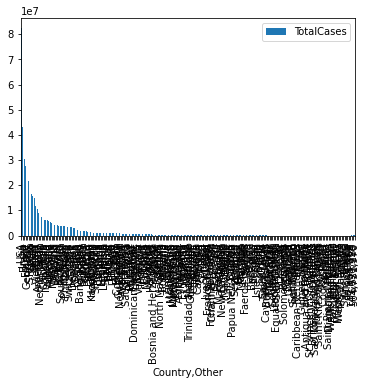

In [80]:
df_plot.plot(kind='bar',x='Country,Other',y='TotalCases')

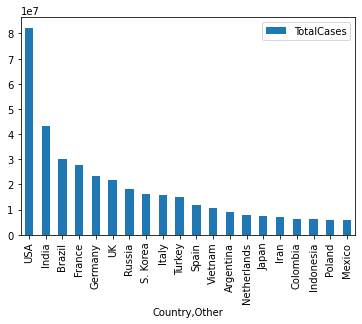

In [81]:
df_plot[:20].plot(kind='bar',x='Country,Other',y='TotalCases')

In [82]:
df_plot[:20]

Country,Other  TotalCases
0            USA  82316348.0
1          India  43043266.0
2         Brazil  30252618.0
3         France  27771024.0
4        Germany  23438293.0
5             UK  21747638.0
6         Russia  18074717.0
7       S. Korea  16353495.0
8          Italy  15712088.0
9         Turkey  14994937.0
10         Spain  11662214.0
11       Vietnam  10432547.0
12     Argentina   9060923.0
13   Netherlands   8015576.0
14         Japan   7334352.0
15          Iran   7206959.0
16      Colombia   6089662.0
17     Indonesia   6039873.0
18        Poland   5985251.0
19        Mexico   5727668.0

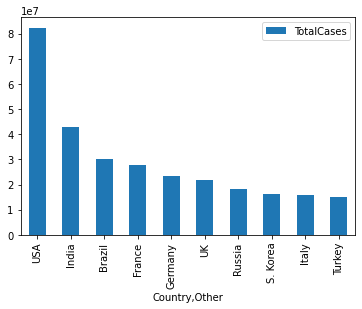

In [83]:
df_plot[:10].plot(kind='bar',x='Country,Other',y='TotalCases')

In [84]:
df_plot[:10]

Country,Other  TotalCases
0           USA  82316348.0
1         India  43043266.0
2        Brazil  30252618.0
3        France  27771024.0
4       Germany  23438293.0
5            UK  21747638.0
6        Russia  18074717.0
7      S. Korea  16353495.0
8         Italy  15712088.0
9        Turkey  14994937.0